# Spectral induced polarization

We analyze the data using Python and make use of the pyGIMLi class `SIPSpectrum` that is able to load the res files, plot, and fit the data using different models. First, we import the module and the constant pi.

For installing pyGIMLi, we refer to the [website](https://www.pygimli.org/installation.html)
This notebook was used with pyGIMLi v1.5.5

In [55]:
from math import pi
from pygimli.physics import SIPSpectrum

## The background - Gneiss

We load the data, also providing the geometric factor $k$.
If the apparent resistivity is negative (M-N or A-B exchanged), we simply use a negative k.
As v1.5.5 did not incorporate the last file format changes (from ° to mrad), we need to correct the phase by $\pi$/180.

SIPSpectrum object
nf=21 min/max=0.011444/12000.0


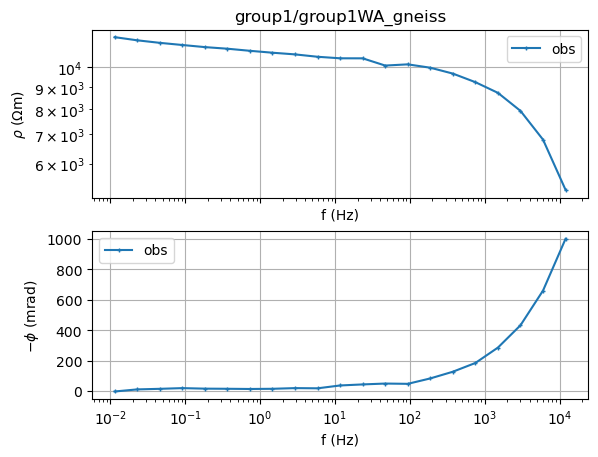

In [68]:
spec = SIPSpectrum("group1/group1WA_gneiss.res", k=2*pi*0.1)
print(spec)
spec.phi *= 180 / pi / 1000
spec.showData(); #

The spectrum is dominated by high-frequency (capacative) coupling due to the high-resistivity environment and small cable distances. This can be also observed by a linear increase of the imaginary conductivity over frequency in a log-log scale.

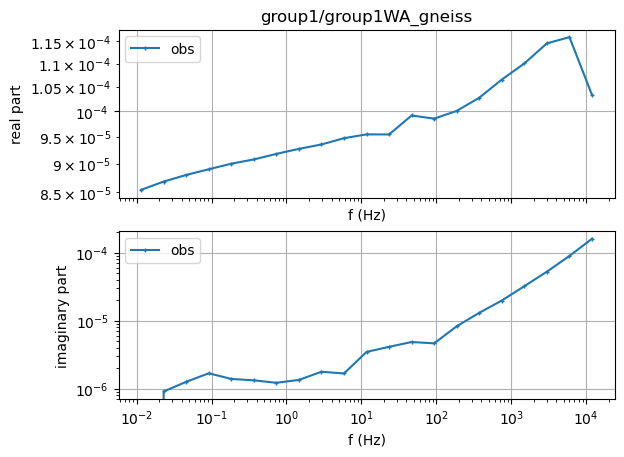

In [69]:
spec.showData(cond=True);

detected epsilon of  213.45760918958575


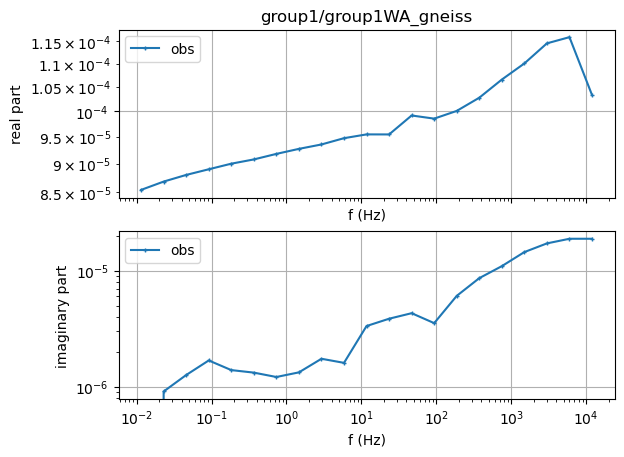

In [70]:
spec.removeEpsilonEffect(mode=0)
spec.showData(cond=True);

The Kramers-Kronig relations allow computing the real from the imaginary part and vice versa and can be used as a measure of data consistency.

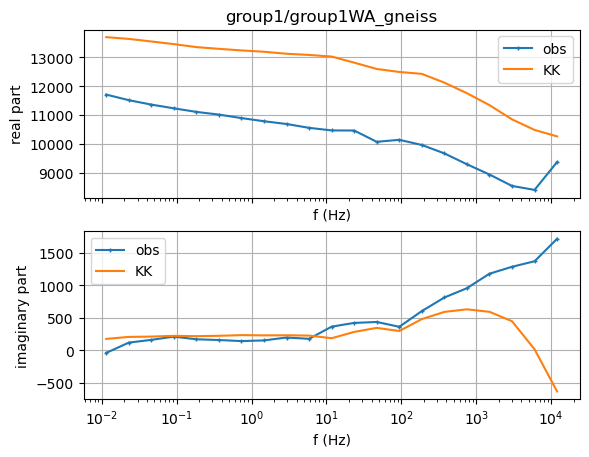

In [71]:
spec.showDataKK();

We observe that the data might be reliable at frequencies between 20mHz and 100Hz, so we cut it there.

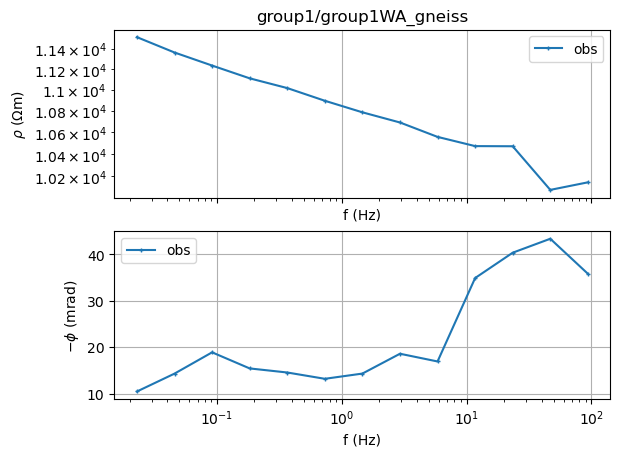

In [72]:
spec.cutF(100.)
spec.cutF(0.02, down=True);
spec.showData();


In total, we observe very high resistivities of about 10000 Ohmm and low chargeabilities of 10-20mrad.
Fitting of these does not make too much sense, but we'll do it anyway.

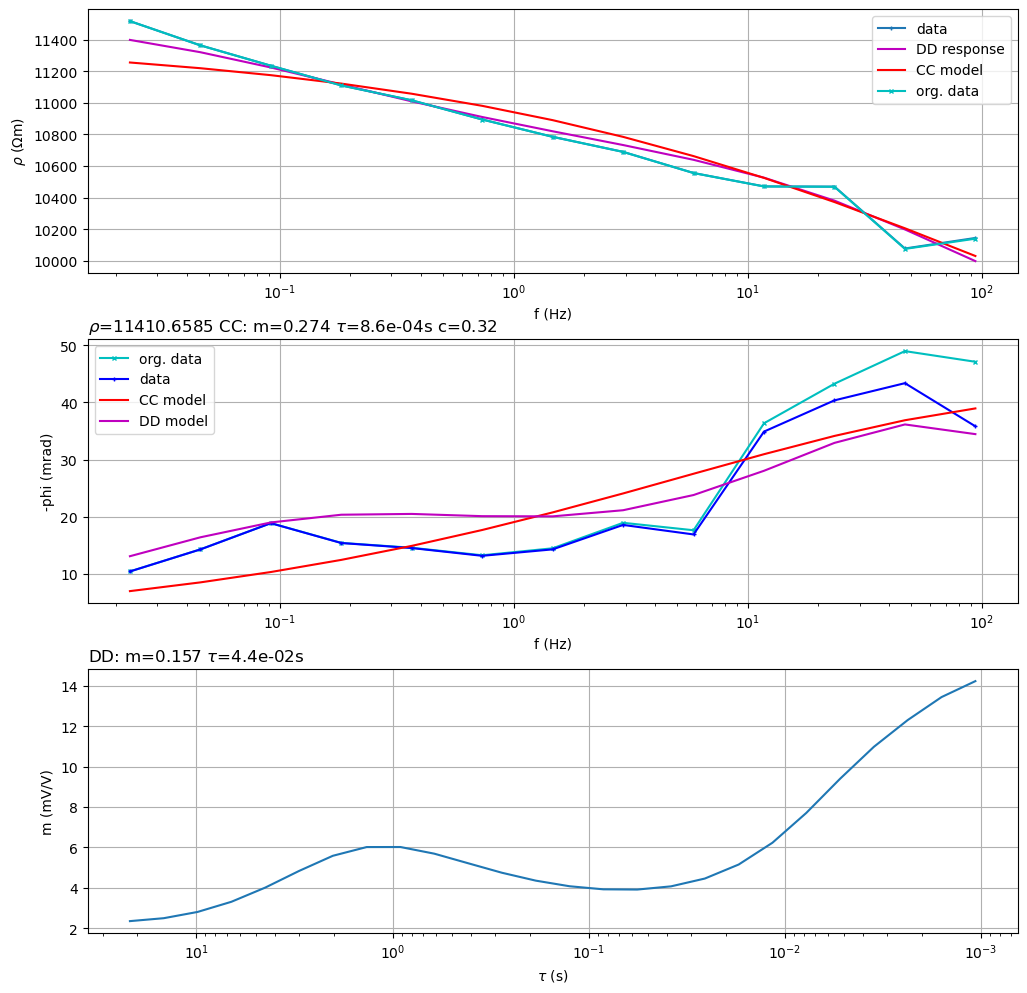

In [73]:
spec.fitColeCole()
spec.fitDebyeModel()
spec.showAll();
# spec.saveFigures() # saves all open figures as pdf

## The ore

We take the measurement of another group.

SIPSpectrum object
nf=22 min/max=0.011444/20000.0


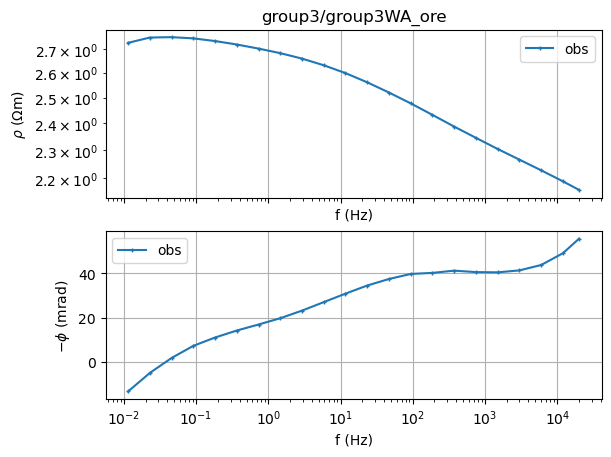

In [97]:
spec = SIPSpectrum("group3/group3WA_ore.res", k=-2*pi*0.1)
print(spec)
spec.phi *= 180 / pi / 1000
spec.showData();

Resistivities are in the range of 2 Ohmm, phases increase with frequency.
The high-frequency disturbances are much lower and the consistency is much better.

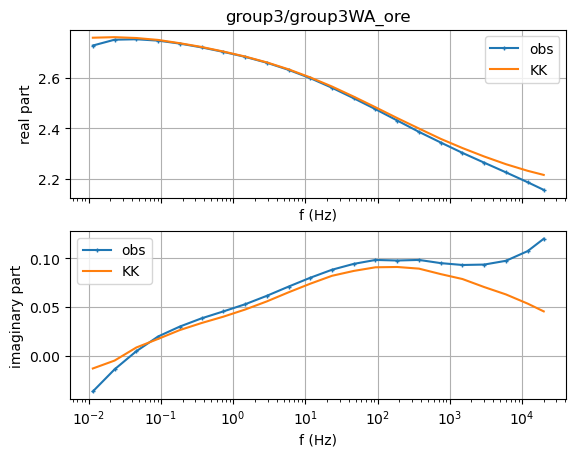

In [98]:
spec.showDataKK();

detected epsilon of  7461.310873821391


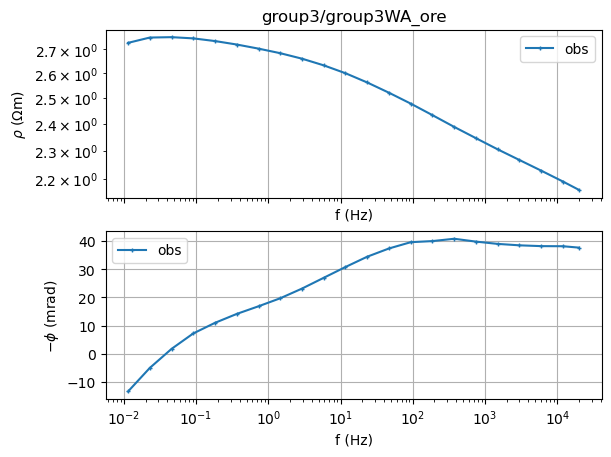

In [99]:
spec.removeEpsilonEffect(mode=0)
spec.showData();

We can trust the data (according to Kramers-Kronig and positivity) from about 30mHz to 400Hz.

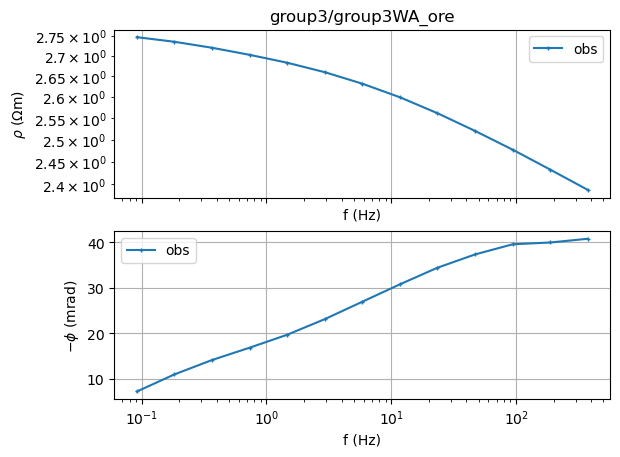

In [100]:
spec.cutF(400.)
spec.cutF(0.05, down=True);
spec.showData();

We observe a phase peak of the polarization at about 100 Hz and fit a Cole-Cole model to it.

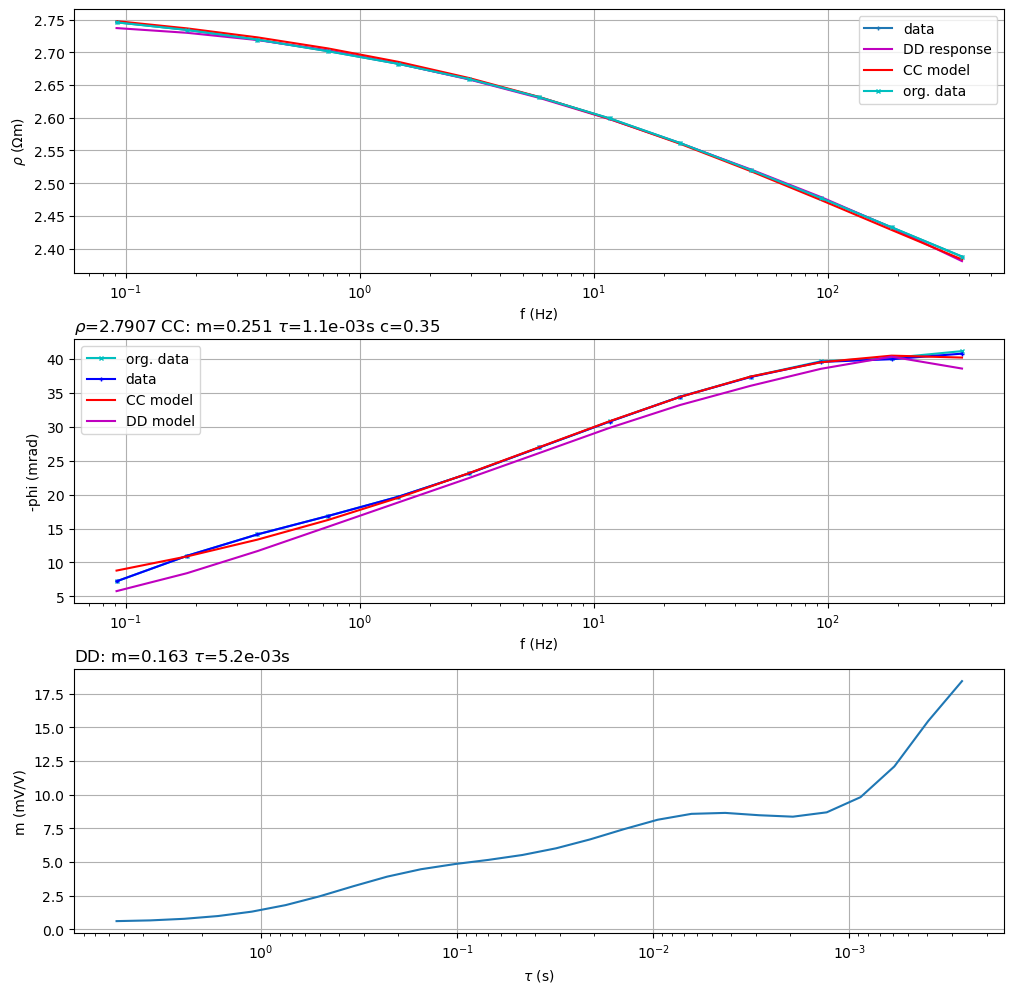

In [101]:
spec.fitColeCole()
spec.fitDebyeModel()
spec.showAll();
# spec.saveFigures() # saves all open figures as pdf

As a result we have a chargeability of about 200mV/V at a time constant of about 3ms.
The phases seem not to be much higher, but we should rather look at the imaginary conductivity for comparison and see that the ore values are three orders of magnitude higher than the less polarisable Gneiss.

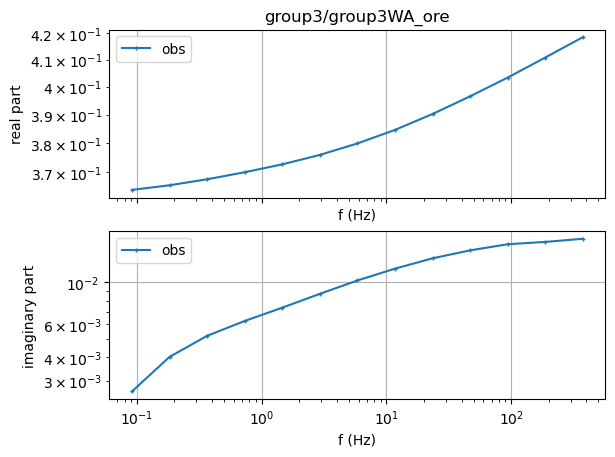

In [102]:
spec.showData(cond=True);